<a href="https://colab.research.google.com/github/kartikbatra056/AllAboutTimeSeries/blob/main/Baseline_and_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Get Dataset From kaggle

In [50]:
! pip install -q kaggle
! pip install --upgrade statsmodels

     |████████████████████████████████| 9.5MB 2.6MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [2]:
from google.colab import files
uploaded=files.upload()

Saving kaggle.json to kaggle.json


In [4]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [5]:
! kaggle datasets download -d 'rohanrao/nifty50-stock-market-data'

 72% 13.0M/18.0M [00:00<00:00, 69.8MB/s]
100% 18.0M/18.0M [00:00<00:00, 71.4MB/s]


In [6]:
!unzip '/content/nifty50-stock-market-data.zip'

Archive:  /content/nifty50-stock-market-data.zip
  inflating: ADANIPORTS.csv          
  inflating: ASIANPAINT.csv          
  inflating: AXISBANK.csv            
  inflating: BAJAJ-AUTO.csv          
  inflating: BAJAJFINSV.csv          
  inflating: BAJFINANCE.csv          
  inflating: BHARTIARTL.csv          
  inflating: BPCL.csv                
  inflating: BRITANNIA.csv           
  inflating: CIPLA.csv               
  inflating: COALINDIA.csv           
  inflating: DRREDDY.csv             
  inflating: EICHERMOT.csv           
  inflating: GAIL.csv                
  inflating: GRASIM.csv              
  inflating: HCLTECH.csv             
  inflating: HDFC.csv                
  inflating: HDFCBANK.csv            
  inflating: HEROMOTOCO.csv          
  inflating: HINDALCO.csv            
  inflating: HINDUNILVR.csv          
  inflating: ICICIBANK.csv           
  inflating: INDUSINDBK.csv          
  inflating: INFRATEL.csv            
  inflating: INFY.csv                
 

In [57]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import warnings
from statsmodels.tsa.api import SimpleExpSmoothing,Holt,ExponentialSmoothing
warnings.filterwarnings('ignore')

# Exploratory Data analysis 

In [2]:
# Load Reliance dataset
df=pd.read_csv('/content/RELIANCE.csv',parse_dates=['Date'])
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,RELIANCE,EQ,233.05,237.50,251.70,237.50,251.70,251.70,249.37,4456424,1.111319e+14,NaN,NaN,NaN
1,2000-01-04,RELIANCE,EQ,251.70,258.40,271.85,251.30,271.85,271.85,263.52,9487878,2.500222e+14,NaN,NaN,NaN
2,2000-01-05,RELIANCE,EQ,271.85,256.65,287.90,256.65,286.75,282.50,274.79,26833684,7.373697e+14,NaN,NaN,NaN
3,2000-01-06,RELIANCE,EQ,282.50,289.00,300.70,289.00,293.50,294.35,295.45,15682286,4.633254e+14,NaN,NaN,NaN
4,2000-01-07,RELIANCE,EQ,294.35,295.00,317.90,293.00,314.50,314.55,308.91,19870977,6.138388e+14,NaN,NaN,NaN


In [3]:
df.describe(include='all')

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,5184,5184,5184,5184.000000,5184.000000,5184.000000,5184.000000,5184.000000,5184.000000,5184.000000,5.184000e+03,5.184000e+03,2.334000e+03,4.670000e+03,4670.000000
unique,5184,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2007-09-10 00:00:00,RELIANCE,EQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,5184,5184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,2000-01-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2020-10-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,987.786950,989.319367,1003.356231,973.918981,987.975174,988.138310,988.720230,5.415171e+06,5.624868e+14,1.350124e+05,2.222530e+06,0.436906
std,NaN,NaN,NaN,556.920215,558.434355,567.971926,546.551339,556.899904,557.018527,557.138677,4.804231e+06,7.660574e+14,1.181286e+05,1.834661e+06,0.145468
min,NaN,NaN,NaN,203.200000,205.500000,219.500000,197.150000,203.300000,203.200000,212.290000,5.282000e+04,4.295543e+12,2.991000e+03,2.909700e+04,0.076300
25%,NaN,NaN,NaN,560.412500,563.137500,572.862500,553.512500,561.325000,561.450000,561.632500,2.813994e+06,2.168086e+14,7.104150e+04,1.177226e+06,0.324050


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5184 entries, 0 to 5183
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                5184 non-null   datetime64[ns]
 1   Symbol              5184 non-null   object        
 2   Series              5184 non-null   object        
 3   Prev Close          5184 non-null   float64       
 4   Open                5184 non-null   float64       
 5   High                5184 non-null   float64       
 6   Low                 5184 non-null   float64       
 7   Last                5184 non-null   float64       
 8   Close               5184 non-null   float64       
 9   VWAP                5184 non-null   float64       
 10  Volume              5184 non-null   int64         
 11  Turnover            5184 non-null   float64       
 12  Trades              2334 non-null   float64       
 13  Deliverable Volume  4670 non-null   float64     

In [5]:
df.set_index(['Date'],inplace=True)
df.sort_index(inplace=True)

In [6]:
# Looking for Duplicates
df.duplicated().sum()
df['Pct_change']=df['VWAP'].pct_change()

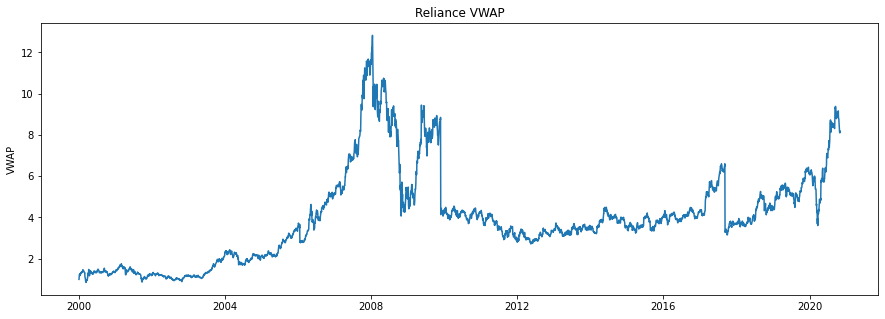

In [7]:
# Visualize VWAP
plt.figure(figsize=(15,5))
plt.plot(df['VWAP']/df['VWAP'][0])
plt.title('Reliance VWAP')
plt.ylabel('VWAP')
plt.show()

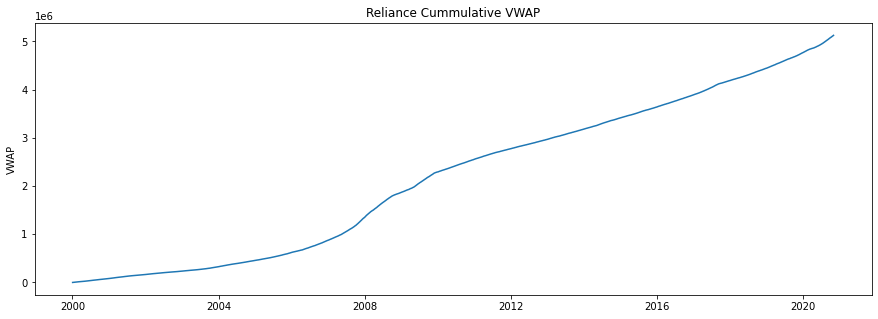

In [86]:
# Visualize Cumsum VWAP
plt.figure(figsize=(15,5))
plt.plot(df['VWAP'].cumsum())
plt.title('Reliance Cummulative VWAP')
plt.ylabel('VWAP')
plt.show()

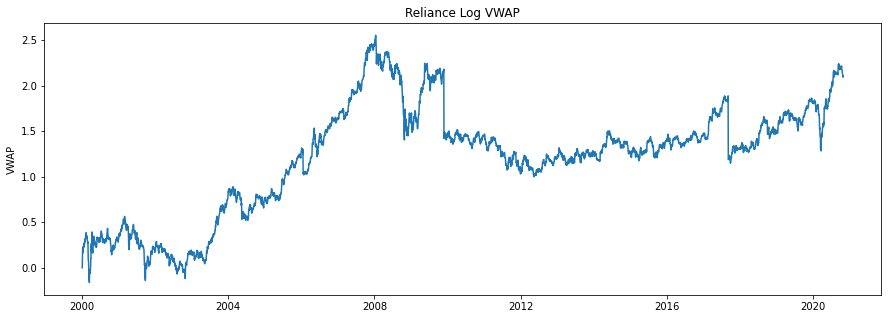

In [8]:
# Visualize Log of VWAP
plt.figure(figsize=(15,5))
plt.plot(np.log(df['VWAP']/df['VWAP'][0]))
plt.title('Reliance Log VWAP')
plt.ylabel('VWAP')
plt.show()

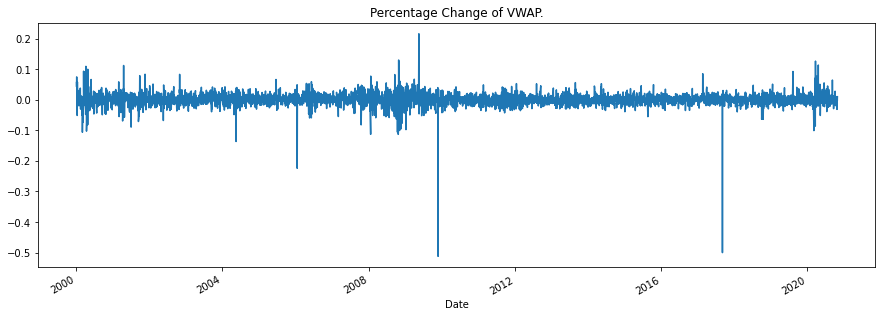

In [9]:
# Visualize Percentage Change of VWAP
plt.figure(figsize=(15,5))
df['Pct_change'].plot()
plt.title('Percentage Change of VWAP.')
plt.show()

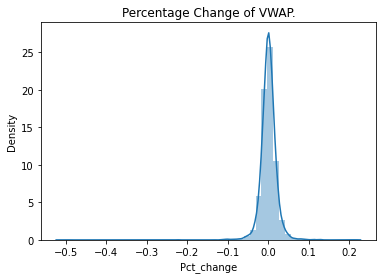

In [10]:
sns.distplot(df['Pct_change'])
plt.title('Percentage Change of VWAP.')
plt.show()

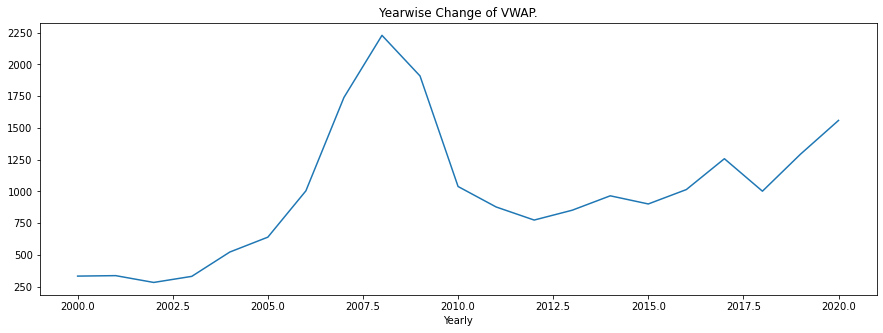

In [11]:
df['Yearly']=df.index.year
mean_year=df.groupby(['Yearly']).median()['VWAP']
plt.figure(figsize=(15,5))
mean_year.plot()
plt.title('Yearwise Change of VWAP.')
plt.show()

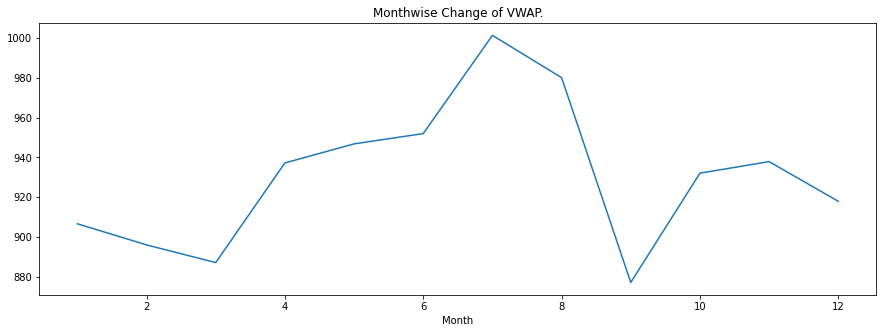

In [12]:
df['Month']=df.index.month
mean_month=df.groupby(['Month']).median()['VWAP']
plt.figure(figsize=(15,5))
mean_month.plot()
plt.title('Monthwise Change of VWAP.')
plt.show()

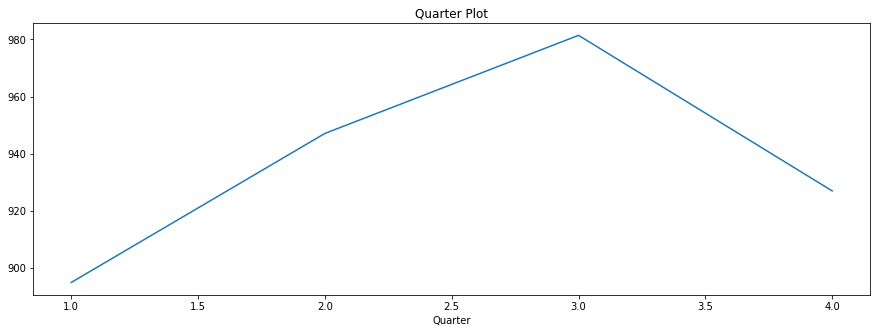

In [13]:
df['Quarter']=df.index.quarter
mean_Quarter=df.groupby(['Quarter']).median()['VWAP']
plt.figure(figsize=(15,5))
mean_Quarter.plot()
plt.title('Quarter Plot')
plt.show()

In [14]:
train_df,test_df=df[:int(df.shape[0]*0.75)],df[-int(df.shape[0]*0.25):]
train_df.shape,test_df.shape

((3888, 18), (1296, 18))

In [15]:
from sklearn.metrics import mean_squared_error
def MAPE(pred,target):
    mape=np.mean(np.abs(target-pred)/target)*100
    return mape

In [16]:
def plot_graph(data,pred,target):
     '''
      Plot input,tagret and prediction
     Parameters: 
        data:input training data
        pred: prediction 
        target: test data
     returns :
          plot graph     
     '''
  
     plt.figure(figsize=(15,5))
     plt.plot(data,label='Train data')
     plt.plot(target.index,pred,label='Prediction')
     plt.plot(target,label='Target')
     plt.title(f'MAPE is :{MAPE(pred,target.values)}')
     plt.legend()
     plt.show()

# Baseline Model

*   Simplest model we can have is taking mean of previous values

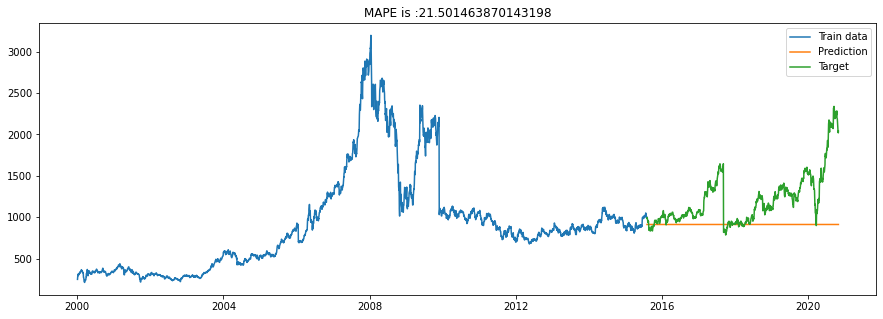

In [17]:
pred=len(test_df)*[np.mean(train_df['VWAP'])]
plot_graph(train_df['VWAP'],pred,test_df['VWAP'])

#### Moving Average Model


In [18]:
def moving_average(data,window=7):
    '''
      plot rolling mean of data alongwith upper and lower limit.
        Parameters:
           data: pandas series to plot
           window: window to take mean
        return :
           plot graph with title as MAPE of model   
    '''

    plt.figure(figsize=(15,7))
    plt.plot(data[window:],label='Series')
    
    mean_df=data.rolling(window=window).mean()
    
    mae=MAPE(mean_df[window:],data[window:])
    
    plt.plot(mean_df[window:],label='Moving average')
    
    deviation=np.std(data[window:]-mean_df[window:])
    upper_limit=mean_df+(mae+2*deviation)
    lower_limit=mean_df-(mae+2*deviation)
    
    plt.plot(upper_limit,'r--',label='Upper limit/lower limit')
    plt.plot(lower_limit,'r--')
    
    plt.xlabel('Date')
    plt.ylabel('VWAP')
    plt.title(f'MAPE is: {mae}')
    plt.show()

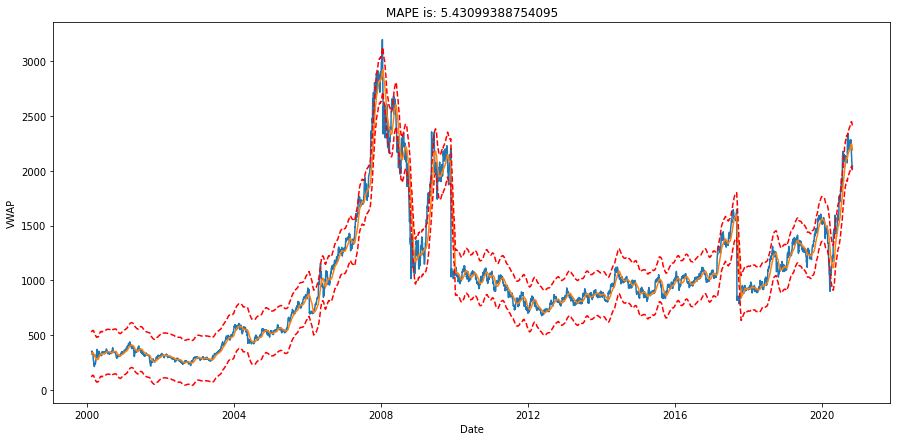

In [78]:
# Moving average with window 30
moving_average(df['VWAP'],window=30)

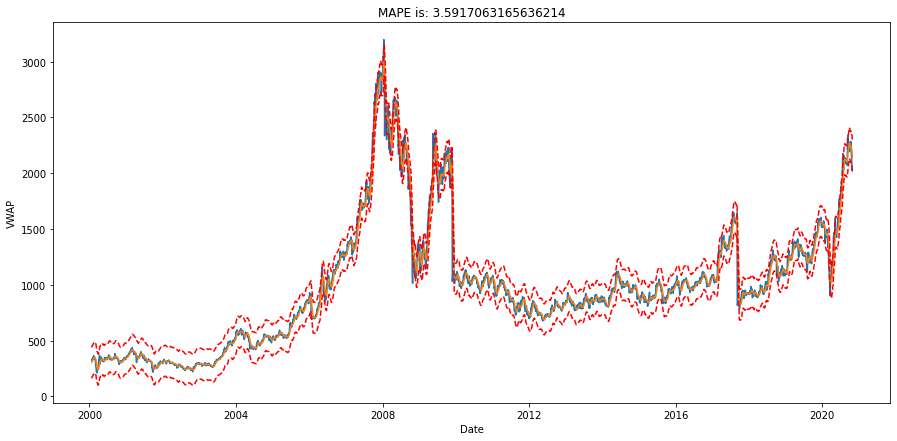

In [20]:
# Moving average with window 15
moving_average(df['VWAP'],window=15)

In [21]:
def SimpleExpSmoothPlot(data,test_data,alpha=.2):
     '''
        plot Simple Exponential Smooth of data alongwith upper and lower limit.
          Parameters:
            data: pandas train_data series to plot
            test_data: pandas test_data series to plot
            alpha: smoothing factor
          return :
            plot graph with title as MAPE of model   
     '''

     plt.figure(figsize=(15,7))
     plt.plot(data.index,data,label='InputSeries')
     
     m=SimpleExpSmoothing(data).fit(smoothing_level=alpha,optimized=False)     
     pred=m.forecast(len(test_data))
     
     plt.plot(test_data,label='Target')
     plt.plot(test_data.index,pred,label='Prediction')
     

     mae=MAPE(pred,test_data.values)
     plt.title(f'MAPE is:{mae}')
     plt.xlabel('Date')
     plt.ylabel('VWAP')
     plt.legend()
     plt.show()

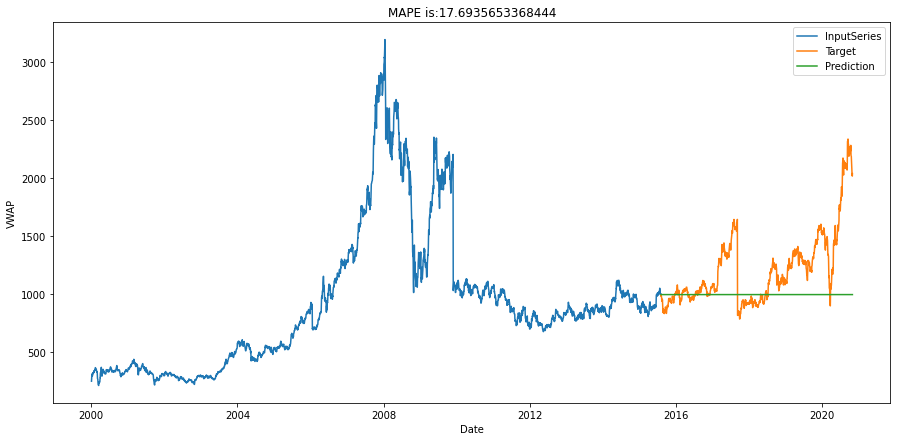

In [22]:
SimpleExpSmoothPlot(train_df['VWAP'],test_df['VWAP'],alpha=.5)

In [30]:
def ExpSmoothPlot(data,test_data,alpha=.2,beta=0.2,exp=False,damp=False,damp_trend=0.5):
     '''
        plot Holt's Exponential Smooth of data alongwith upper and lower limit.
          Parameters:
            data: pandas train_data series to plot
            test_data: pandas test_data series to plot
            alpha: smoothing factor
            beta: smoothing trend
          return :
            plot graph with title as MAPE of model   
     '''
     plt.figure(figsize=(15,7))
     plt.plot(data.index,data,label='InputSeries')
     
     m=Holt(data,exponential=exp, damped_trend=damp).fit(smoothing_level=alpha,smoothing_trend=beta,damping_trend=damp_trend,optimized=False)     
     pred=m.forecast(len(test_data))
     
     plt.plot(test_data,label='Target')
     plt.plot(test_data.index,pred,label='Prediction')
     

     mae=MAPE(pred,test_data.values)
     plt.title(f'MAPE is:{mae}')
     plt.xlabel('Date')
     plt.ylabel('VWAP')
     plt.legend()
     plt.show()

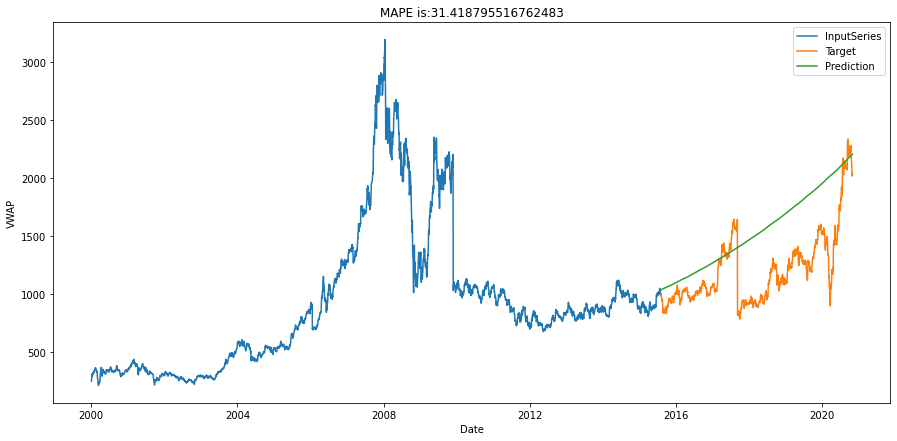

In [56]:
ExpSmoothPlot(train_df['VWAP'],test_df['VWAP'],alpha=.1,beta=0.1,exp=True)

In [62]:
def TripleExpSmoothPlot(data,test_data,alpha=.2,beta=0.2,period=4,season='add',trend='add',transform=False,damp=False):
     '''
        plot Triple Exponential Smooth of data.
          Parameters:
            data: pandas train_data series to plot
            test_data: pandas test_data series to plot
            
          return :
            plot graph with title as MAPE of model   
     '''
     plt.figure(figsize=(15,7))
     plt.plot(data.index,data,label='InputSeries')
     
     m=ExponentialSmoothing(data, seasonal_periods=period, trend=trend, seasonal=season, damped_trend=damp, use_boxcox=transform,initialization_method="estimated").fit()     
     pred=m.forecast(len(test_data))
     
     plt.plot(test_data,label='Target')
     plt.plot(test_data.index,pred,label='Prediction')
     
     mae=MAPE(pred,test_data.values)
     plt.title(f'MAPE is:{mae}')
     plt.xlabel('Date')
     plt.ylabel('VWAP')
     plt.legend()
     plt.show()

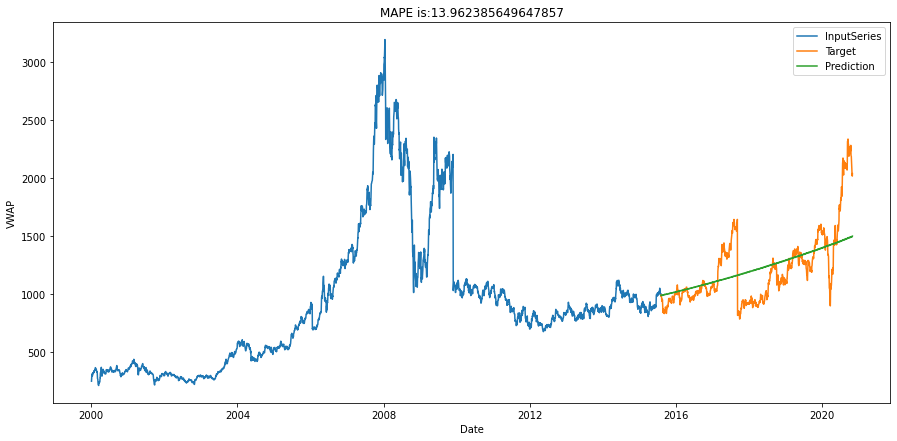

In [75]:
TripleExpSmoothPlot(train_df['VWAP'],test_df['VWAP'],period=12,season='mul',trend='mul',transform=True,damp=False)